In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler1=StandardScaler()
scaler2=MinMaxScaler()
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the DataFrame 'df' with the 'Month' column
# Load the data into a pandas dataframe
df = pd.read_excel('pc_cleaned_1_holiday.xlsx')

# Calculate the 'Season' column based on the 'Month' column
df['Season'] = (df['Month'] % 12) // 3 + 1

df.drop([ 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],axis=1)


df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df.set_index('Datetime', inplace=True)
df_info = df.info()
print(df_info)
df.to_excel('pc_cleaned_2_holiday_season.xlsx')

In [3]:
df=pd.read_excel('pc_cleaned_2_holiday_season.xlsx')

## correlation of variables

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,Month,Day,Hour,Minute,Holiday,Season
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,2.843350e-01,1.926774e-02,1.971305e-01,-6.724601e-05,4.187014e-02,5.587897e-01
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-1.741931e-02,-4.540307e-02,-2.426916e-01,4.929864e-04,-6.160116e-02,-2.871568e-02
WindSpeed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,1.683554e-01,1.640667e-01,4.148645e-03,-3.136897e-04,7.599124e-02,3.509600e-01
GeneralDiffuseFlows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,-2.055450e-02,3.225334e-02,1.299766e-01,-1.913001e-04,1.635905e-02,7.252524e-02
DiffuseFlows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,-1.297793e-01,-2.827775e-02,1.309090e-01,-1.828407e-03,3.156439e-03,-4.913388e-02
PowerConsumption_Zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,-5.346049e-03,2.627309e-02,7.279525e-01,3.426961e-04,-2.876614e-02,1.292922e-01
Month,0.284335,-0.017419,0.168355,-0.020554,-0.129779,-0.005346,1.000000e+00,4.349864e-03,-5.911819e-16,7.656370e-15,1.899473e-02,5.835493e-01
Day,0.019268,-0.045403,0.164067,0.032253,-0.028278,0.026273,4.349864e-03,1.000000e+00,-9.891896e-17,5.189888e-16,-4.209160e-02,1.166706e-02
Hour,0.197130,-0.242692,0.004149,0.129977,0.130909,0.727953,-5.911819e-16,-9.891896e-17,1.000000e+00,1.912651e-17,-1.892870e-16,-1.561881e-16
Minute,-0.000067,0.000493,-0.000314,-0.000191,-0.001828,0.000343,7.656370e-15,5.189888e-16,1.912651e-17,1.000000e+00,3.699189e-16,4.263934e-15


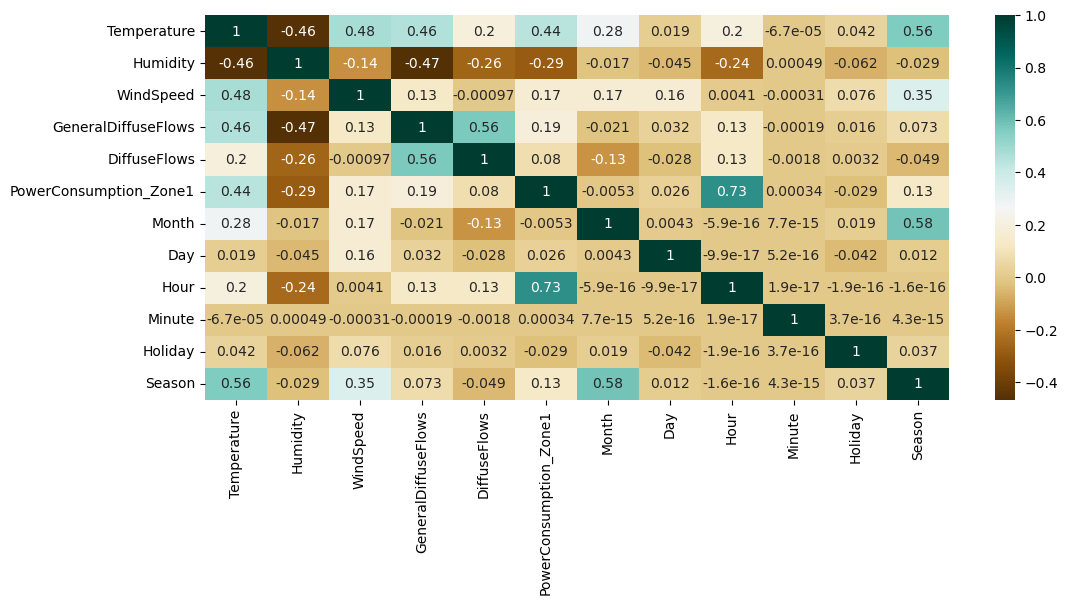

In [36]:
plt.figure(figsize=(12,5))
c = df.corr(numeric_only=False)
sns.heatmap(c,cmap="BrBG",annot=True)
c

## time series split

In [15]:
df.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Month', 'Day',
       'Hour', 'Minute', 'Holiday', 'Season'],
      dtype='object')

In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')
df.set_index('Datetime', inplace=True)

In [5]:
train, test = df[df['Month']<=10], df[df['Month']>10]

X_train = train[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows','DiffuseFlows', 'Month', 'Day', 'Hour', 'Minute', 'Season']]
y_train = np.sqrt(train['PowerConsumption_Zone1'])

X_test = test[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Month', 'Day', 'Hour', 'Minute', 'Season']]
y_test = np.sqrt(test['PowerConsumption_Zone1'])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression

In [7]:
##tscv = TimeSeriesSplit(n_splits=5, max_train_size=4320) # 144 samples per day * 30 days = 4320 samples

In [7]:
tscv = TimeSeriesSplit( max_train_size=4320*3, n_splits=8,test_size=4320)# 144 samples per day * 30 days = 4320 samples

In [13]:
for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
        print(f"Fold {i}:")
        print(f"  Train: index={train_index}")
        print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[   0    1    2 ... 9213 9214 9215]
  Test:  index=[ 9216  9217  9218 ... 13533 13534 13535]
Fold 1:
  Train: index=[  576   577   578 ... 13533 13534 13535]
  Test:  index=[13536 13537 13538 ... 17853 17854 17855]
Fold 2:
  Train: index=[ 4896  4897  4898 ... 17853 17854 17855]
  Test:  index=[17856 17857 17858 ... 22173 22174 22175]
Fold 3:
  Train: index=[ 9216  9217  9218 ... 22173 22174 22175]
  Test:  index=[22176 22177 22178 ... 26493 26494 26495]
Fold 4:
  Train: index=[13536 13537 13538 ... 26493 26494 26495]
  Test:  index=[26496 26497 26498 ... 30813 30814 30815]
Fold 5:
  Train: index=[17856 17857 17858 ... 30813 30814 30815]
  Test:  index=[30816 30817 30818 ... 35133 35134 35135]
Fold 6:
  Train: index=[22176 22177 22178 ... 35133 35134 35135]
  Test:  index=[35136 35137 35138 ... 39453 39454 39455]
Fold 7:
  Train: index=[26496 26497 26498 ... 39453 39454 39455]
  Test:  index=[39456 39457 39458 ... 43773 43774 43775]


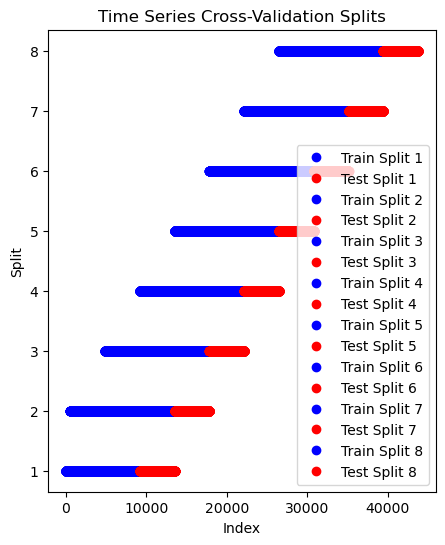

In [50]:
# Plot each split of training and test sets
fig, ax = plt.subplots(figsize=(5, 6))

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    # Plot training set indices in blue
    ax.plot(train_index, [i+1] * len(train_index), 'bo', label=f'Train Split {i+1}')

    # Plot test set indices in red
    ax.plot(test_index, [i+1] * len(test_index), 'ro', label=f'Test Split {i+1}')

# Set plot labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Split')
ax.set_title('Time Series Cross-Validation Splits')
ax.legend()

plt.show()


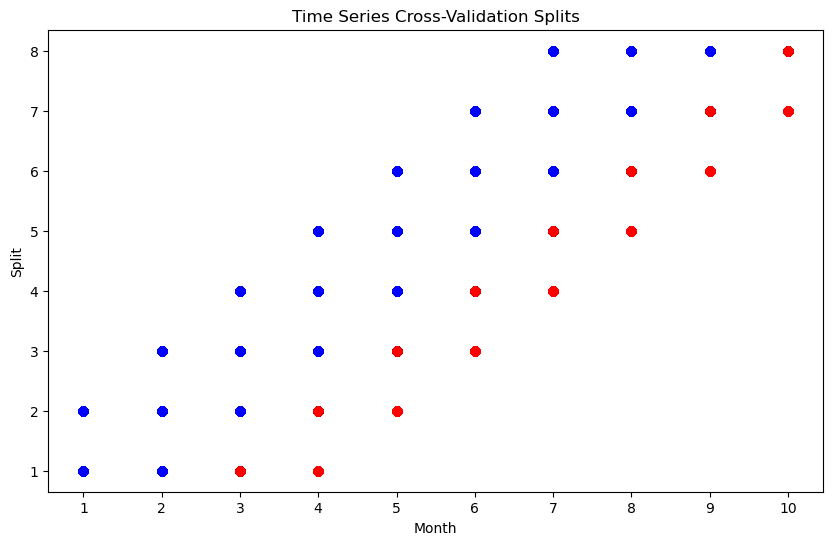

In [72]:
# Get the unique months for x-axis
months = train['Month'].unique()

# Plot each split of training and test sets
fig, ax = plt.subplots(figsize=(10, 6))

for i, (train_index, test_index) in enumerate(tscv.split(X_train)):
    # Get the corresponding months for train and test indices
    train_months = X_train.iloc[train_index]['Month']
    test_months = X_train.iloc[test_index]['Month']

    # Plot training set indices in blue
    ax.plot(train_months, [i+1] * len(train_index), 'bo', label=f'Train Split {i+1}')

    # Plot test set indices in red
    ax.plot(test_months, [i+1] * len(test_index), 'ro', label=f'Test Split {i+1}')

# Set the x-axis labels to be the months
ax.set_xticks(months)
ax.set_xticklabels(months)

# Set plot labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Split')
ax.set_title('Time Series Cross-Validation Splits')

plt.show()

### standard scaler

In [8]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {  }
# Define the pipeline
pipeline = Pipeline(steps=[("scaler", StandardScaler(with_mean=False)), # Preprocessing
                          
                           ("reg", LinearRegression())])
# Do the GridSearchCV (Cross-Validation + Hyperparameter Tuning)
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=tscv)

In [9]:

model.fit(X_train, y_train)
# Retrieve the best model and print the best hyperparameters
best_model = model.best_estimator_
print("Best Hyperparameters:", model.best_params_)

# Use the best model to predict on the validation fold
y_pred = best_model.predict(X_test)


Best Hyperparameters: {}


In [10]:


# Evaluate the performance on the validation fold (e.g., calculate MSE, R-squared, etc.)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 142.26087367184306
MAE: 9.614445718292412
R-squared: 0.5461937206999035


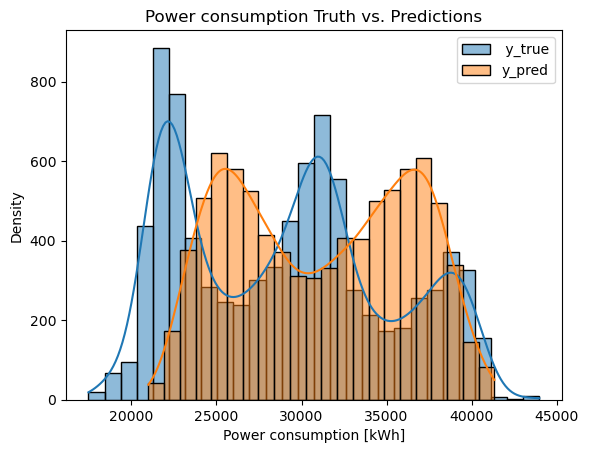

In [11]:
# Histplot of The actudal and the predicted grades
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(y_test**2, label=' y_true', kde=True, line_kws={'color': 'green'})
sns.histplot(y_pred**2, label='y_pred', kde=True, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Power consumption [kWh]')
plt.ylabel('Density')
plt.title('Power consumption Truth vs. Predictions')

# Set the y-axis tick locations and labels
#plt.xticks([i/2 for i in range(21)])

#plt.xlim(0, 60000)

# Add legend
plt.legend()

# Display the plot
plt.show()

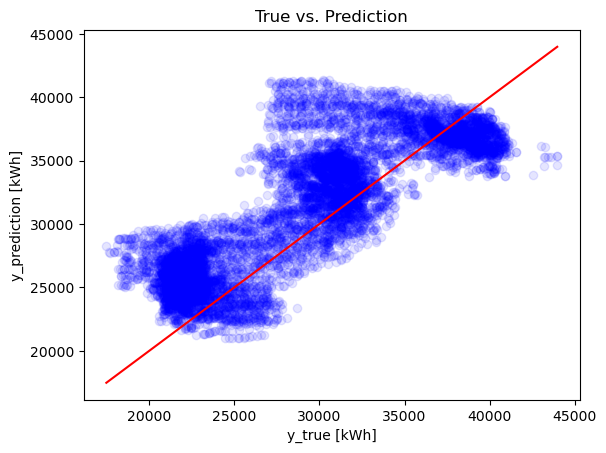

In [12]:
# Plot actual Vs. Predicted 



import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.scatter(y_test**2, y_pred**2, color='blue', alpha=0.1)

# Add a diagonal line indicating perfect predictions
plt.plot([min(y_test**2), max(y_test**2)], [min(y_test**2), max(y_test**2)], color='red')

# Set plot labels and title
plt.xlabel('y_true [kWh]')
plt.ylabel('y_prediction [kWh]')
plt.title('True vs. Prediction')

# Display the plot
plt.show()

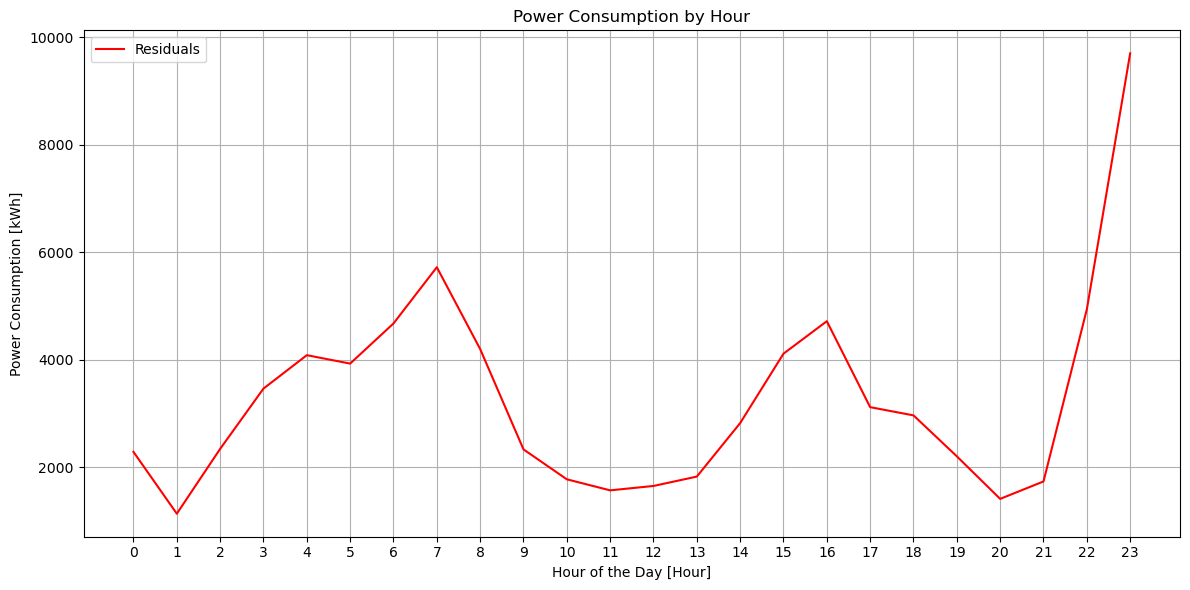

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the residuals (difference between y_pred and y_test)
residuals = abs(y_pred**2 - y_test**2)

# Group the residuals by hour and calculate the mean
residuals_by_hour = residuals.groupby(X_test['Hour']).mean()

# Get the unique hours
hours = np.sort(X_test['Hour'].unique())



# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the residual line
ax.plot(hours, residuals_by_hour.values, label='Residuals', color='red')

# Set labels and titles
ax.set_xlabel('Hour of the Day [Hour]')
ax.set_ylabel('Power Consumption [kWh]')
ax.set_title('Power Consumption by Hour')

# Set x-axis tick locations and labels
ax.set_xticks(hours)
ax.set_xticklabels([str(h) for h in hours])

# Set legend
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


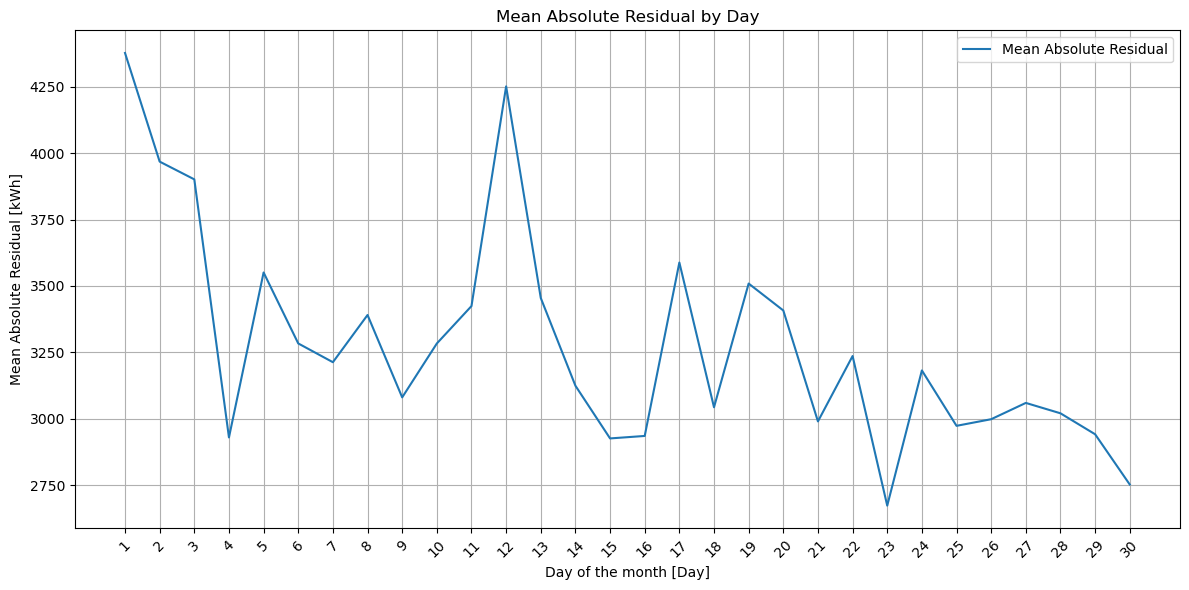

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the residuals (difference between y_pred and y_test)
residuals = abs(y_pred**2 - y_test**2)

# Create a DataFrame with the daily data and residuals
daily_data = pd.DataFrame({'Day': X_test['Day'], 'Residuals': abs(residuals)})

# Group the data by 'Day' and calculate the mean absolute residual
mean_abs_residuals = daily_data.groupby('Day')['Residuals'].mean()

# Get the unique days
days = mean_abs_residuals.index

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean absolute residual against the 'Day'
ax.plot(days, mean_abs_residuals.values, label='Mean Absolute Residual')

# Set labels and title
ax.set_xlabel('Day of the month [Day]')
ax.set_ylabel('Mean Absolute Residual [kWh]')
ax.set_title('Mean Absolute Residual by Day')

# Set x-axis tick labels
ax.set_xticks(days)
ax.set_xticklabels([str(day) for day in days], rotation=45)

# Set legend
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


### minmax scaler

In [15]:
# Define the pipeline
pipeline = Pipeline(steps=[("scaler", MinMaxScaler()), # Preprocessing
                           
                           ("reg", LinearRegression())])
# Do the GridSearchCV (Cross-Validation + Hyperparameter Tuning)
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=tscv)

In [16]:
model.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=12960, n_splits=8, test_size=4320),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('reg', LinearRegression())]),
             param_grid={})

In [18]:
# Retrieve the best model and print the best hyperparameters
best_model = model.best_estimator_
print("Best Hyperparameters:", model.best_params_)

# Use the best model to predict on the validation fold
y_pred = best_model.predict(X_test)

# Evaluate the performance on the validation fold (e.g., calculate MSE, R-squared, etc.)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)

Best Hyperparameters: {}
MSE: 142.26087367184286
MAE: 9.614445718292405
R-squared: 0.546193720699904


## residual plot

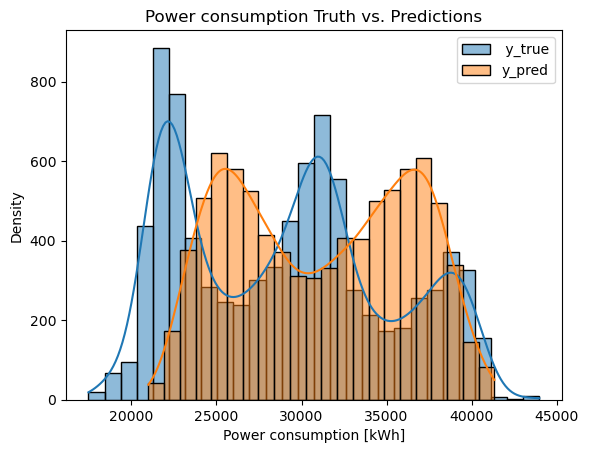

In [19]:
# Histplot of The actudal and the predicted grades
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(y_test**2, label=' y_true', kde=True, line_kws={'color': 'green'})
sns.histplot(y_pred**2, label='y_pred', kde=True, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Power consumption [kWh]')
plt.ylabel('Density')
plt.title('Power consumption Truth vs. Predictions')

# Set the y-axis tick locations and labels
#plt.xticks([i/2 for i in range(21)])

#plt.xlim(15000, 45000)

# Add legend
plt.legend()

# Display the plot
plt.show()

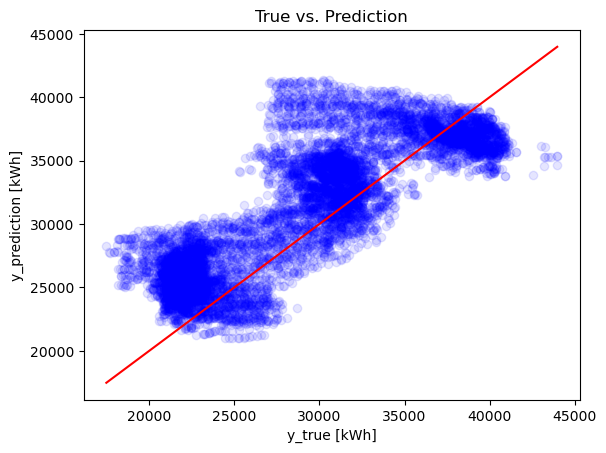

In [20]:
# Plot actual Vs. Predicted 



import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.scatter(y_test**2, y_pred**2, color='blue', alpha=0.1)

# Add a diagonal line indicating perfect predictions
plt.plot([min(y_test**2), max(y_test**2)], [min(y_test**2), max(y_test**2)], color='red')

# Set plot labels and title
plt.xlabel('y_true [kWh]')
plt.ylabel('y_prediction [kWh]')
plt.title('True vs. Prediction')

# Display the plot
plt.show()

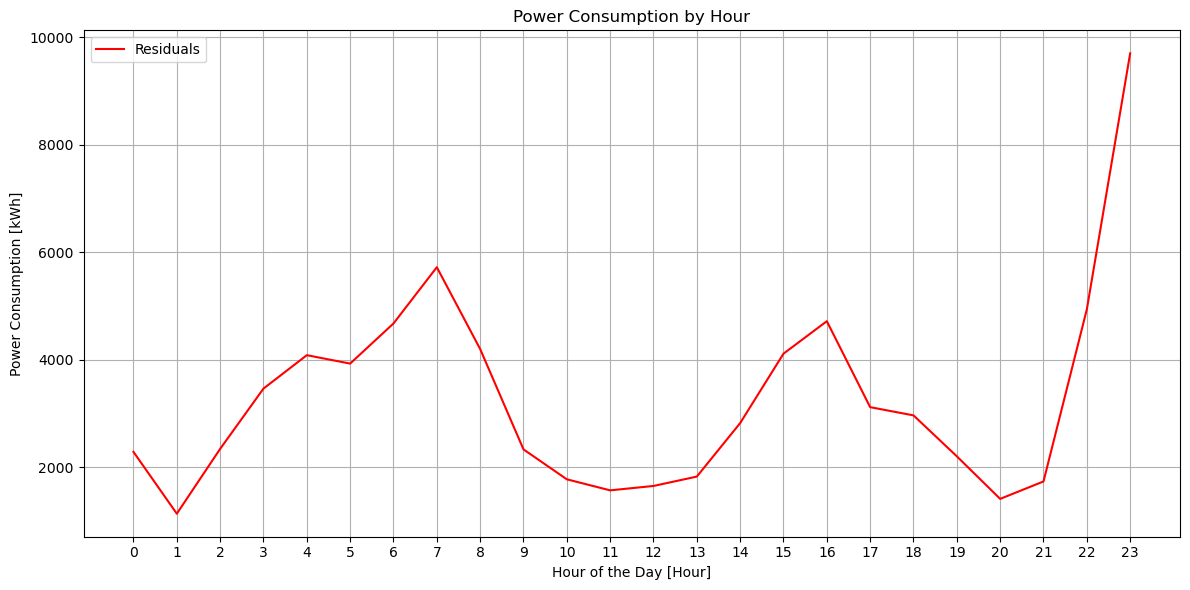

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the residuals (difference between y_pred and y_test)
residuals = abs(y_pred**2 - y_test**2)

# Group the residuals by hour and calculate the mean
residuals_by_hour = residuals.groupby(X_test['Hour']).mean()

# Get the unique hours
hours = np.sort(X_test['Hour'].unique())



# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the residual line
ax.plot(hours, residuals_by_hour.values, label='Residuals', color='red')

# Set labels and titles
ax.set_xlabel('Hour of the Day [Hour]')
ax.set_ylabel('Power Consumption [kWh]')
ax.set_title('Power Consumption by Hour')

# Set x-axis tick locations and labels
ax.set_xticks(hours)
ax.set_xticklabels([str(h) for h in hours])

# Set legend
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


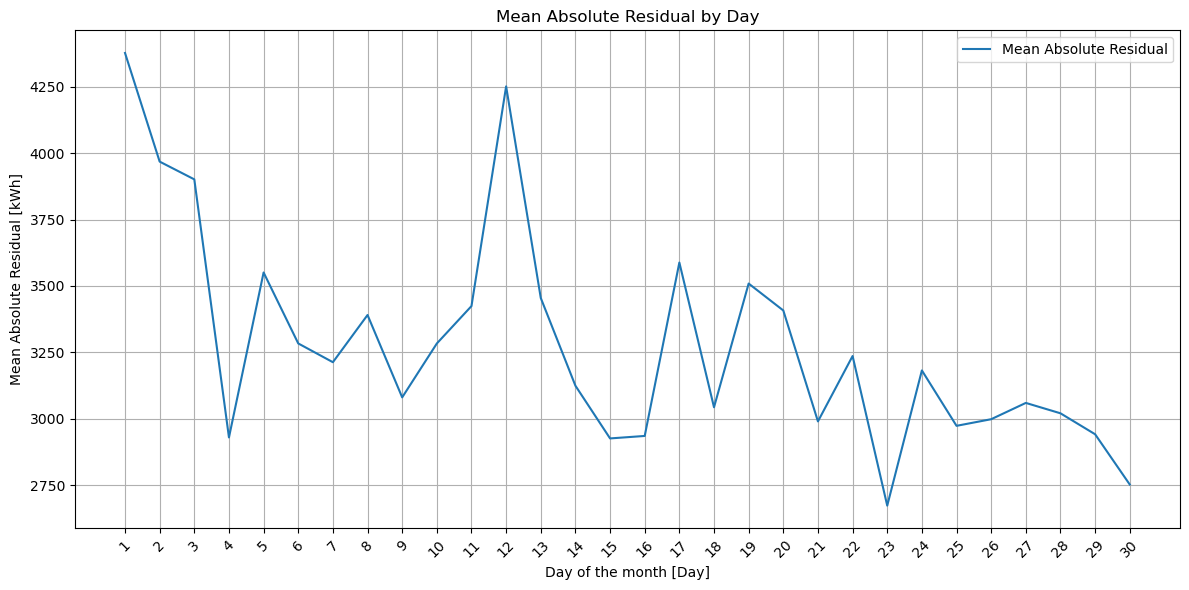

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the residuals (difference between y_pred and y_test)
residuals = abs(y_pred**2 - y_test**2)

# Create a DataFrame with the daily data and residuals
daily_data = pd.DataFrame({'Day': X_test['Day'], 'Residuals': abs(residuals)})

# Group the data by 'Day' and calculate the mean absolute residual
mean_abs_residuals = daily_data.groupby('Day')['Residuals'].mean()

# Get the unique days
days = mean_abs_residuals.index

# Create a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean absolute residual against the 'Day'
ax.plot(days, mean_abs_residuals.values, label='Mean Absolute Residual')

# Set labels and title
ax.set_xlabel('Day of the month [Day]')
ax.set_ylabel('Mean Absolute Residual [kWh]')
ax.set_title('Mean Absolute Residual by Day')

# Set x-axis tick labels
ax.set_xticks(days)
ax.set_xticklabels([str(day) for day in days], rotation=45)

# Set legend
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()
